# Progetto d'esame di Data Analysis in Experimental Physics with Machine Learning

Gruppo composto dagli studenti Luca Attinà, Sharis Feriotto e Matteo Marchisio Caprioglio

Dataset ipotesi: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [268]:
%pip install tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#creazione delle cartelle con le foglie healthy e unhealthy

src_dir = 'D:\progetto-daml\PlantVillage-Dataset\\raw\color'
dst_dir = 'D:\progetto-daml\PlantVillage-Dataset\split_data'
healthy_dir   = os.path.join(dst_dir, 'healthy')
unhealthy_dir = os.path.join(dst_dir, 'unhealthy')
os.makedirs(healthy_dir,   exist_ok=True)
os.makedirs(unhealthy_dir, exist_ok=True)

for sub_f in os.listdir(src_dir):
    src_folder = os.path.join(src_dir, sub_f)
    if not os.path.isdir(src_folder):
        continue

    label = 'healthy' if 'healthy' in sub_f.lower() else 'unhealthy'
    dst_folder = healthy_dir if label == 'healthy' else unhealthy_dir

    for img in os.listdir(src_folder):
        src_img = os.path.join(src_folder, img)
        if not os.path.isfile(src_img):
            continue
        dst_img = os.path.join(dst_folder, img)
        shutil.copy2(src_img, dst_img)


In [ ]:
#creazione dei tre dataset: train, val, test
SRC_DIR    = 'D:\progetto-daml\PlantVillage-Dataset\split_data'
DST_DIR    = 'D:\progetto-daml\PlantVillage-Dataset\\final_data'
TRAIN_FRAC = 0.7
VAL_FRAC   = 0.2
TEST_FRAC  = 0.1
SEED       = 42

#definizione file e labels
files, labels = [], []
for label in ['healthy', 'unhealthy']:
    folder = os.path.join(SRC_DIR, label)
    for fn in os.listdir(folder):
        path = os.path.join(folder, fn)
        if os.path.isfile(path):
            files.append(path)
            labels.append(label)
files  = np.array(files)
labels = np.array(labels)

#train_val vs test (I split)
f_tv, f_test, l_tv, l_test = train_test_split(
    files, labels,
    test_size=TEST_FRAC,
    stratify=labels,
    random_state=SEED
)

#train vs val (II split)
val_rel = VAL_FRAC / (TRAIN_FRAC + VAL_FRAC)
f_train, f_val, l_train, l_val = train_test_split(
    f_tv, l_tv,
    test_size=val_rel,
    stratify=l_tv,
    random_state=SEED
)

#dizionario con i file e le labels per ogni split
splits = {
    'train': (f_train, l_train),
    'val':   (f_val,   l_val),
    'test':  (f_test,  l_test),
}

#creazione delle cartelle
for split, (fpaths, lpaths) in splits.items():
    for label in ['healthy', 'unhealthy']:
        out_folder = os.path.join(DST_DIR, split, label)
        os.makedirs(out_folder, exist_ok=True)
    for src_path, lab in zip(fpaths, lpaths):
        dst_path = os.path.join(DST_DIR, split, lab, os.path.basename(src_path))
        shutil.copy2(src_path, dst_path)

# Stampa del numero di immagini in ogni split
for split in ['train','val','test']:
    h = len(os.listdir(os.path.join(DST_DIR, split, 'healthy')))
    u = len(os.listdir(os.path.join(DST_DIR, split, 'unhealthy')))
    print(f"{split:5s}: healthy={h:4d}, unhealthy={u:4d}  (total={h+u})")

train: healthy=10558, unhealthy=27455  (total=38013)
val  : healthy=3017, unhealthy=7844  (total=10861)
test : healthy=1509, unhealthy=3922  (total=5431)


In [171]:
path = 'D:\progetto-daml\PlantVillage-Dataset\\final_data'
train_path = path + "\\train"
val_path = path + "\\val"
test_path = path + "\\test"


In [275]:
test_path


'D:\\progetto-daml\\PlantVillage-Dataset\\final_data\\test'

In [274]:
%ls "{train_path}"
%ls "{val_path}"
%ls "{test_path}"


 Il volume nell'unit� D � Dati
 Numero di serie del volume: 4EB6-C579

 Directory di D:\progetto-daml\PlantVillage-Dataset\final_data\train

16/07/2025  14:41    <DIR>          .
16/07/2025  14:41    <DIR>          ..
16/07/2025  14:51    <DIR>          healthy
16/07/2025  14:51    <DIR>          unhealthy
               0 File              0 byte
               4 Directory  942.305.533.952 byte disponibili
 Il volume nell'unit� D � Dati
 Numero di serie del volume: 4EB6-C579

 Directory di D:\progetto-daml\PlantVillage-Dataset\final_data\val

16/07/2025  14:51    <DIR>          .
16/07/2025  14:51    <DIR>          ..
16/07/2025  14:55    <DIR>          healthy
16/07/2025  14:55    <DIR>          unhealthy
               0 File              0 byte
               4 Directory  942.305.533.952 byte disponibili
 Il volume nell'unit� D � Dati
 Numero di serie del volume: 4EB6-C579

 Directory di D:\progetto-daml\PlantVillage-Dataset\final_data\val

16/07/2025  14:51    <DIR>          .
16/

In [204]:
#resize delle immagini
img_size = (128, 128)
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical' 
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)


Found 38013 files belonging to 2 classes.
Found 10861 files belonging to 2 classes.
Found 10861 files belonging to 2 classes.
Found 5431 files belonging to 2 classes.
Found 5431 files belonging to 2 classes.


Shape dell’immagine: (128, 128, 3)  - Label: [1. 0.]


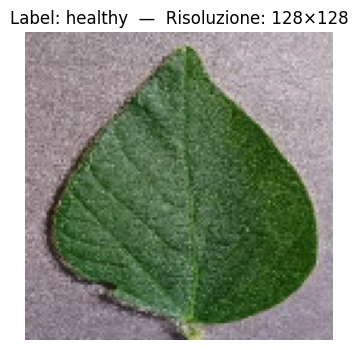

In [276]:
for imgs, labels in train_ds.take(1):
    img = imgs[0].numpy().astype("uint8")
    lbl = labels[0].numpy()
    break

print("Shape dell’immagine:", img.shape, " - Label:", lbl)  # → (128, 128, 3)

class_names = train_ds.class_names
lbl_int = np.argmax(lbl)
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')
plt.title(f"Label: {class_names[lbl_int]}  —  Risoluzione: {img.shape[0]}×{img.shape[1]}")
plt.show()

In [223]:
# ipotesi modello
# convolutional 2d
# relu activation
# maxpooling forse?


In [316]:
#definizione del modello
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D

def leaves_model():
    inputs = tf.keras.Input(shape=(128, 128, 3), name='input_layer')
    x = Conv2D(16, (3, 3), name='conv_1', padding="same")(inputs)
    x = BatchNormalization(name='batch_norm_1')(x)
    x = Activation('relu',name='activ_1')(x)
    x = MaxPooling2D((2, 2),name='maxpool_1')(x)

    x = Conv2D(32, (3, 3), name='conv_2', padding='same')(x)
    x = BatchNormalization(name='batch_norm_2')(x)
    x = Activation('relu',name='activ_2')(x)
    x = MaxPooling2D((2, 2),name='maxpool_2')(x)
    x = Dropout(0.2,name='dropout_1')(x)

    x = Conv2D(64, (3, 3), name='conv_3', padding='same')(x)
    x = BatchNormalization(name='batch_norm_3')(x)
    x = Activation('relu',name='activ_3')(x)
    x = MaxPooling2D((2, 2),name='maxpool_3')(x)
    x = Dropout(0.3,name='dropout_2')(x)

    x = GlobalAveragePooling2D(name='global_avgpool')(x)
    x = Dropout(0.5,name='dropout_3')(x)  
    x = Dense(2, activation="softmax", name="predictions")(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model


In [317]:
N_EPOCHS = 10

In [319]:
model = leaves_model()

In [320]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1 (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activ_1 (Activation)            │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activ_2 (Activation)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activ_3 (Activation)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_3 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avgpool                  │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,162 (94.38 KB)

 Trainable params: 23,938 (93.51 KB)

 Non-trainable params: 224 (896.00 B)

In [321]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=N_EPOCHS,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
    ],
    verbose=1
)

Epoch 1/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 375s 312ms/step - accuracy: 0.7199 - loss: 0.6162 - val_accuracy: 0.8703 - val_loss: 0.2791 - learning_rate: 1.0000e-04
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 375s 312ms/step - accuracy: 0.7199 - loss: 0.6162 - val_accuracy: 0.8703 - val_loss: 0.2791 - learning_rate: 1.0000e-04
Epoch 2/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 307s 259ms/step - accuracy: 0.8521 - loss: 0.3245 - val_accuracy: 0.8844 - val_loss: 0.2481 - learning_rate: 1.0000e-04
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 307s 259ms/step - accuracy: 0.8521 - loss: 0.3245 - val_accuracy: 0.8844 - val_loss: 0.2481 - learning_rate: 1.0000e-04
Epoch 3/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 307s 259ms/step - accuracy: 0.8784 - loss: 0.2750 - val_accuracy: 0.9152 - val_loss: 0.2097 - learning_rate: 1.0000e-04
Epoch 4/10
1188/1188 ━━━━━━━━━━━━━━━━━━━━ 307s 259ms/step - accuracy: 0.8784 - loss: 0.2750 - val_accuracy: 0.9152 - val_loss: 0.2097 - learning_rate: 1.0000e-04
Epoch 4/10
1188/1188 ━━━━━━━

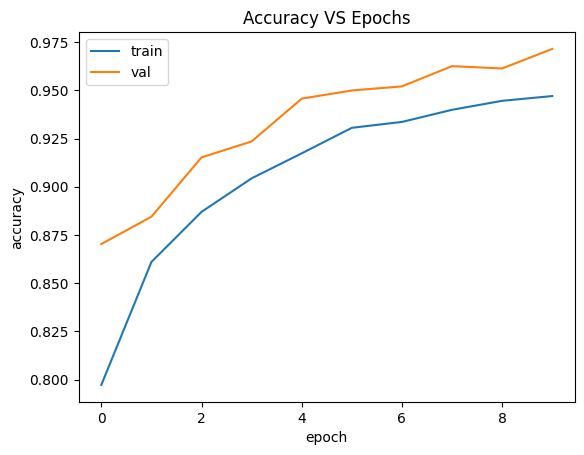

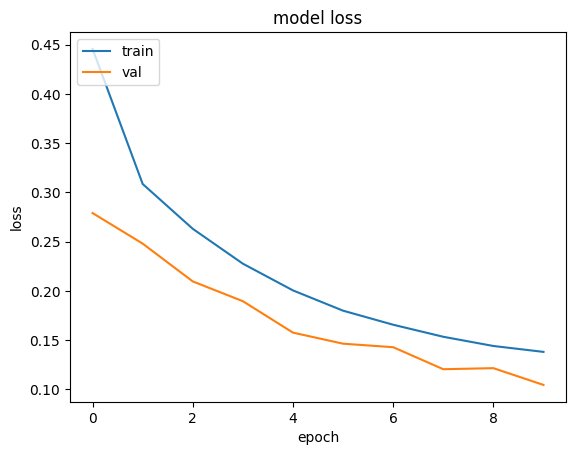

In [ ]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy VS Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss VS Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [323]:
#predizioni su test dataset
predict_test = model.predict(test_ds)

170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 25s 142ms/step


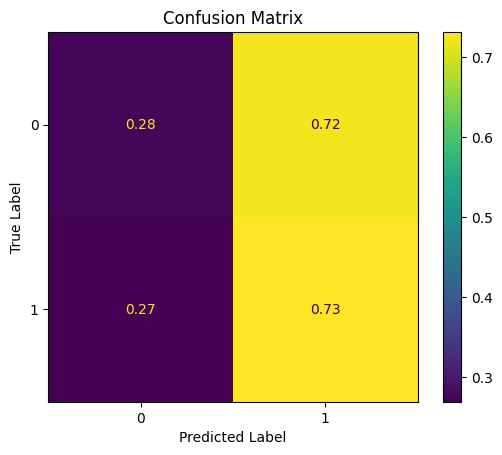

In [328]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_true = np.concatenate([np.argmax(labels.numpy(), axis=1) for _, labels in test_ds], axis=0)
y_predict = np.argmax(predict_test, axis=1)
matrix = ConfusionMatrixDisplay.from_predictions(y_true, y_predict, normalize='true')
matrix.ax_.set_title('Confusion Matrix')
matrix.ax_.set_xlabel('Predicted Label')
matrix.ax_.set_ylabel('True Label')
plt.show()

In [ ]:
#check delle classi di test
(unique_true, counts_true) = np.unique(y_true,      return_counts=True)
(unique_pred, counts_pred) = np.unique(y_predict,      return_counts=True)

print("y_true  counts:", dict(zip(unique_true, counts_true)))
print("y_pred  counts:", dict(zip(unique_pred, counts_pred)))


y_true  counts: {0: 1509, 1: 3922}
y_pred  counts: {0: 1473, 1: 3958}


Found 5431 files belonging to 2 classes.
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step


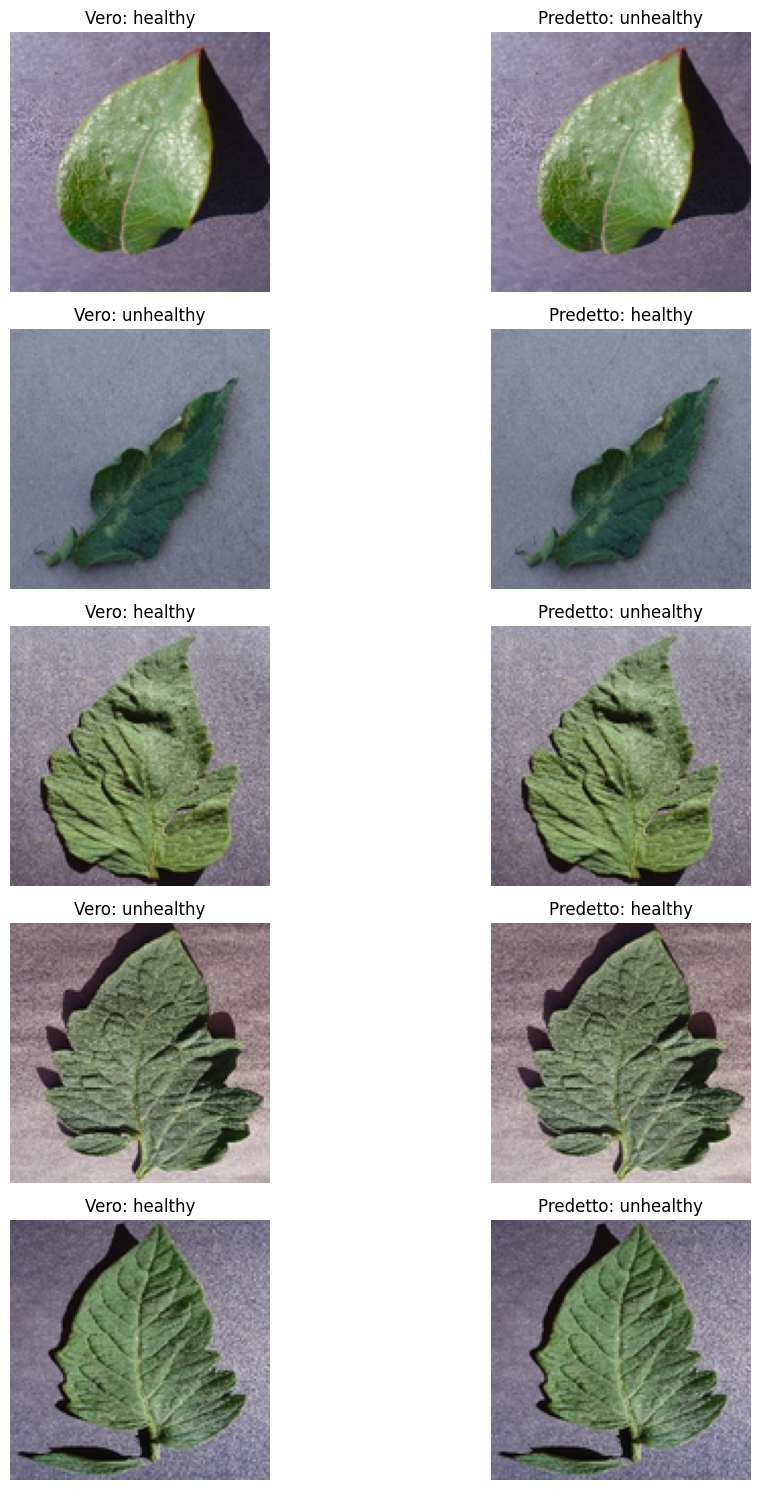

In [346]:
#check per visualizzare gli errori di predizione
import random
import matplotlib.pyplot as plt
from PIL import Image

# 1) Ricrea test_ds senza shuffle
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(128,128),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

# 2) Estrai y_true e y_pred
y_true    = np.concatenate([np.argmax(lbl,axis=1) for _,lbl in test_ds], axis=0)
y_predict = np.argmax(model.predict(test_ds), axis=1)

# 3) Prendi file_paths
file_list = test_ds.file_paths  # ora è esattamente allineato a y_true/y_predict

# 4) Visualizza gli errori
errors = np.where(y_true != y_predict)[0]
sample_idxs = random.sample(list(errors), k=min(5, len(errors)))

plt.figure(figsize=(12, 3*len(sample_idxs)))
for i, idx in enumerate(sample_idxs):
    path = file_list[idx]
    true_cls = test_ds.class_names[y_true[idx]]
    pred_cls = test_ds.class_names[y_predict[idx]]
    img = Image.open(path).resize((128,128), Image.LANCZOS)

    plt.subplot(len(sample_idxs), 2, 2*i+1)
    plt.imshow(img); plt.axis('off')
    plt.title(f"Vero: {true_cls}")

    plt.subplot(len(sample_idxs), 2, 2*i+2)
    plt.imshow(img); plt.axis('off')
    plt.title(f"Predetto: {pred_cls}")

plt.tight_layout()
plt.show()


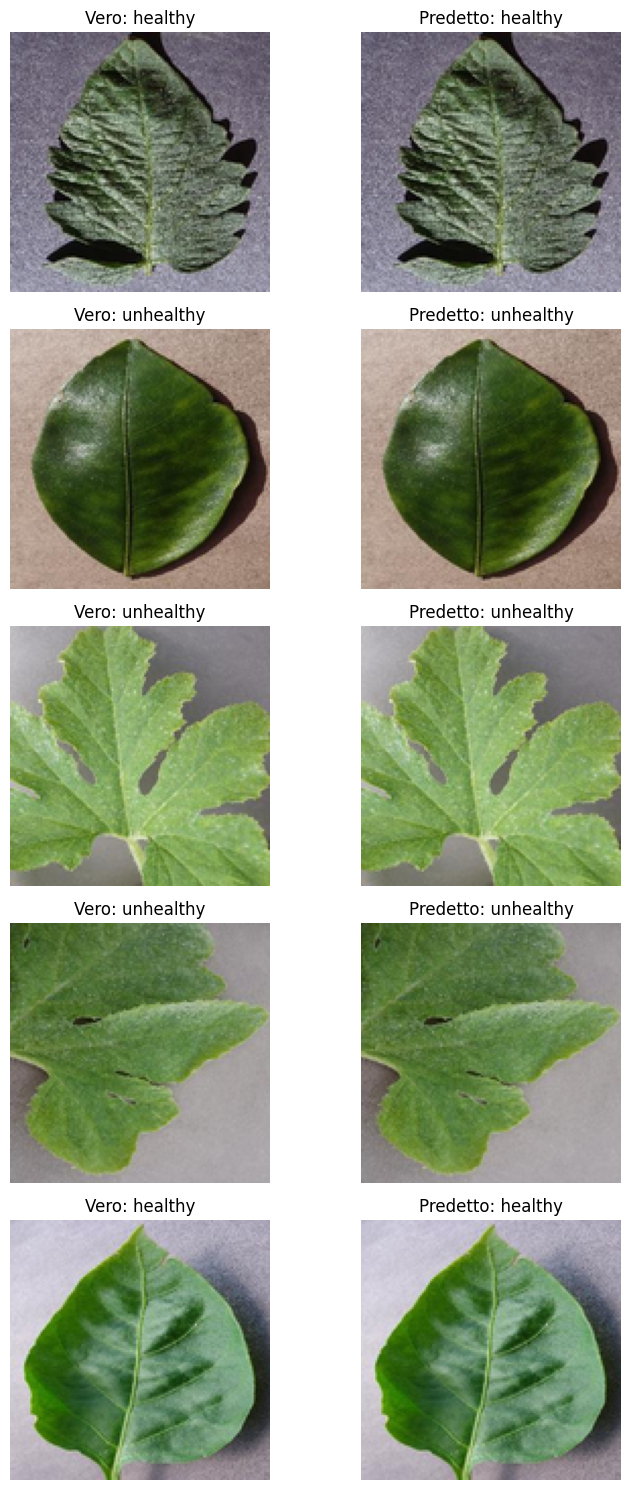

In [ ]:
# 1) Lista di indici corretti
corrects = np.where(y_true == y_predict)[0]
sample_corrects = random.sample(list(corrects), k=5)

# 2) Ricostruisci file_list come prima
file_list = []
for cls in test_ds.class_names:
    folder = os.path.join(test_path, cls)
    for fname in sorted(os.listdir(folder)):
        file_list.append((os.path.join(folder, fname), cls))

# 3) Visualizza side-by-side Vero vs Predetto (che qui coincidono)
plt.figure(figsize=(8, 3*len(sample_corrects)))
for i, idx in enumerate(sample_corrects):
    path, true_cls = file_list[idx]
    img = Image.open(path).convert('RGB').resize((128,128), Image.LANCZOS)

    plt.subplot(len(sample_corrects), 2, 2*i+1)
    plt.imshow(img); plt.axis('off')
    plt.title(f"Vero: {true_cls}")

    plt.subplot(len(sample_corrects), 2, 2*i+2)
    plt.imshow(img); plt.axis('off')
    plt.title(f"Predetto: {true_cls}")

plt.tight_layout()
plt.show()
